In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization, Dropout
import cv2


Using TensorFlow backend.


In [55]:
X_train = np.zeros((15*3, 24,24))
y_train = np.zeros(15*3)

for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/circle/circle{0:03d}.png'.format(i+1), 0)        
    X_train[i,:,:] = img
    y_train[i] = 0
    
for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/rectangle/rectangle{0:03d}.png'.format(i+1), 0)        
    X_train[15+i,:,:] = img
    y_train[15+i] = 1
    
for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/triangle/triangle{0:03d}.png'.format(i+1), 0)        
    X_train[30+i,:,:] = img
    y_train[30+i] = 2     
    



In [58]:
X_test = np.zeros((5*3, 24,24))
y_test = np.zeros(5*3)

for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/circle/circle{0:03d}.png'.format(i+21), 0)        
    X_test[i,:,:] = img
    y_test[i] = 0
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/rectangle/rectangle{0:03d}.png'.format(i+21), 0)        
    X_test[5+i,:,:] = img
    y_test[5+i] = 1
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/triangle/triangle{0:03d}.png'.format(i+21), 0)        
    X_test[10+i,:,:] = img
    y_test[10+i] = 2

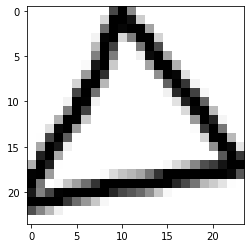

Label:  2.0


In [59]:
plt.imshow(X_test[14], cmap="gray")    # show first number in the dataset
plt.show()
print('Label: ', y_test[14])

In [60]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45, 24, 24) (15, 24, 24) (45, 3) (15, 3)


In [61]:
# 4차원으로 변경
X_train =  X_train.reshape(-1, 24,24,1)
X_test =  X_test.reshape(-1, 24,24,1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45, 24, 24, 1)
(15, 24, 24, 1)
(45, 3)
(15, 3)


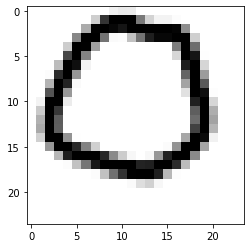

In [62]:
plt.imshow(X_train[2,:,:,0], cmap="gray")  
plt.show()

In [75]:
# 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(24,24,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Conv2D(64, (3, 3))) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128)) 
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(64)) 
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
# 모델 학습시키기 #1
history = model.fit(X_train, y_train, batch_size = 15, epochs = 100, validation_data =(X_test, y_test), verbose = 0)

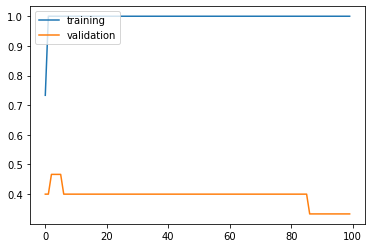

15/15 [==============================] - 0s 262us/step
[2.4486119747161865, 0.3333333432674408]


In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
results = model.evaluate(X_test, y_test)
print(results)